## 3 УРОК БАЗОВЫЕ ЗАПРОСЫ SQL


### Схема базы данных
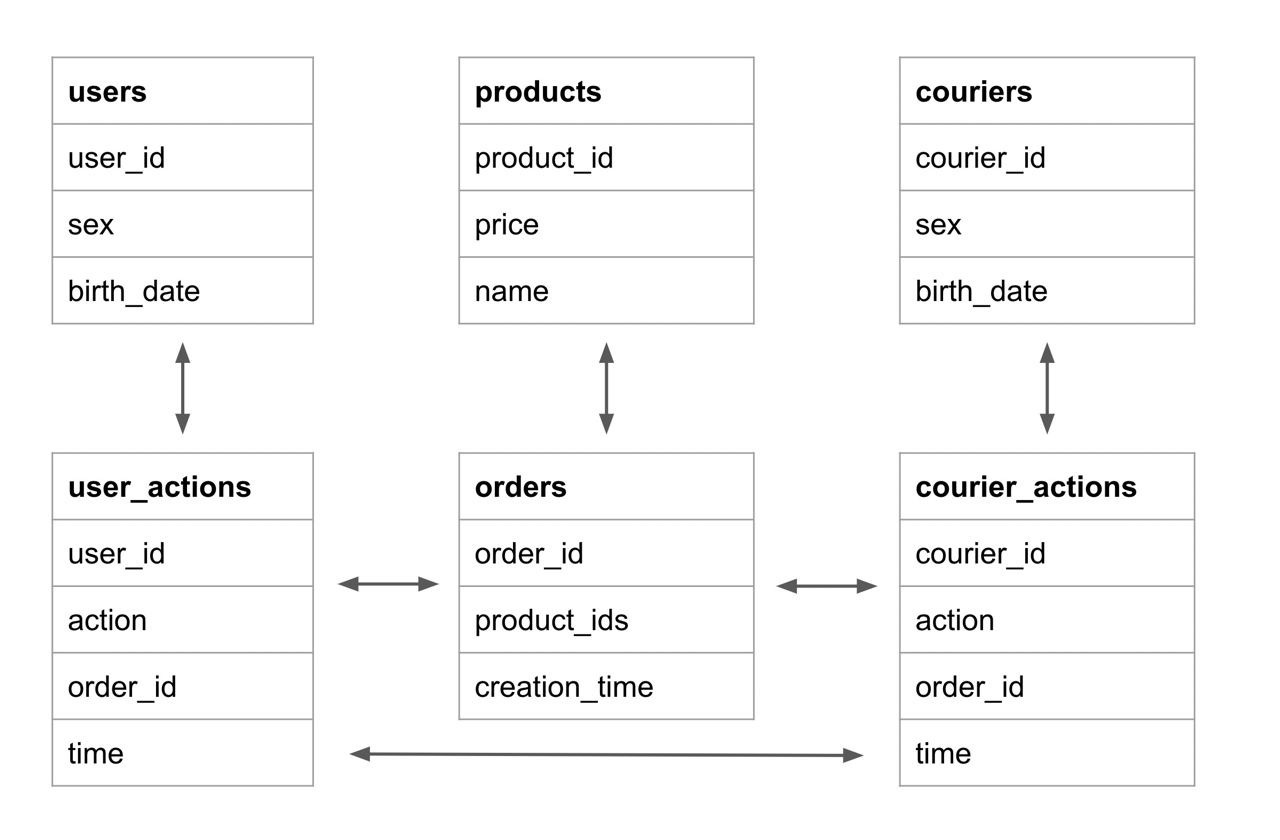

### Задача 1

Выведите все записи из таблицы products.

Поля в результирующей таблице: product_id, name, price

```mysql
SELECT *
FROM   products
```

### Задача 2

Выведите все записи из таблицы products, отсортировав их по наименованиям товаров в алфавитном порядке, т.е. по возрастанию. Для сортировки используйте оператор ORDER BY.

Поля в результирующей таблице: product_id, name, price

```mysql
SELECT *
FROM   products
ORDER BY name asc
```

### Задача 3

Отсортируйте таблицу courier_actions сначала по колонке courier_id по возрастанию id курьера, потом по колонке action (снова по возрастанию), а затем по колонке time, но уже по убыванию — от самого последнего действия к самому первому. Не забудьте включить в результат колонку order_id.

Добавьте в запрос оператор LIMIT и выведите только первые 1000 строк результирующей таблицы.

Поля в результирующей таблице: courier_id, order_id, action, time

```mysql
SELECT courier_id,
       order_id,
       action,
       time
FROM   courier_actions
ORDER BY courier_id asc, action asc, time desc limit 1000
```

### Задача 4

Используя операторы SELECT, FROM, ORDER BY и LIMIT, определите 5 самых дорогих товаров в таблице products, которые доставляет наш сервис. Выведите их наименования и цену.

Поля в результирующей таблице: name, price

```mysql
SELECT name,
       price
FROM   products
ORDER BY price desc limit 5
```

### Задача 5

Повторите запрос из предыдущего задания, но теперь колонки name и price переименуйте соответственно в product_name и product_price.

Поля в результирующей таблице: product_name, product_price

```mysql
SELECT name as product_name,
       price as product_price
FROM   products
ORDER BY price desc limit 5
```

### Задача 6

Используя операторы SELECT, FROM, ORDER BY и LIMIT, а также функцию LENGTH, определите товар с самым длинным названием в таблице products. Выведите его наименование, длину наименования в символах, а также цену этого товара. Колонку с длиной наименования в символах назовите name_length.

Поля в результирующей таблице: name, name_length, price

```mysql
SELECT name,
       length(name) as name_length,
       price
FROM   products
ORDER BY name_length desc limit 1
```

### Задача 7

Примените последовательно функции UPPER и SPLIT_PART к колонке name и преобразуйте наименования товаров в таблице products так, чтобы от названий осталось только первое слово, записанное в верхнем регистре. Колонку с новым названием, состоящим из первого слова, назовите first_word.

В результат включите исходные наименования товаров, новые наименования из первого слова, а также цену товаров. Результат отсортируйте по возрастанию исходного наименования товара в колонке name.

Поля в результирующей таблице: name, first_word, price

```mysql
SELECT name,
       upper(split_part(name, ' ', 1)) as first_word,
       price
FROM   products
ORDER BY name asc
```

### Задача 8

Измените тип колонки price из таблицы products на VARCHAR. Выведите колонки с наименованием товаров, ценой в исходном формате и ценой в формате VARCHAR. Новую колонку с ценой в новом формате назовите price_char.

Результат отсортируйте по возрастанию исходного наименования товара в колонке name. Количество выводимых записей не ограничивайте.

Поле в результирующей таблице: name, price, price_char

```mysql
SELECT name,
       price,
       price :: varchar as price_char
FROM   products
ORDER BY name asc
```

### Задача 9

Для первых 200 записей из таблицы orders выведите информацию в следующем виде (обратите внимание на пробелы):

Заказ № [id_заказа] создан [дата]

Полученную колонку назовите order_info.

```mysql
SELECT concat('Заказ № ',
              order_id,
              ' создан ',
              creation_time :: date) as order_info
FROM   orders limit 200
```

### Задача 10

Выведите id всех курьеров и их годы рождения из таблицы couriers.

Год рождения необходимо получить из колонки birth_date. Новую колонку с годом назовите birth_year. Результат отсортируйте сначала по убыванию года рождения курьера (т.е. от самых младших к самым старшим), затем по возрастанию id курьера.

Поля в результирующей таблице: courier_id, birth_year

```mysql
SELECT courier_id,
       date_part('year', birth_date) as birth_year
FROM   couriers
ORDER BY birth_year desc, courier_id asc
```

### Задача 11

Как и в предыдущем задании, снова выведите id всех курьеров и их годы рождения, только теперь к извлеченному году примените функцию COALESCE. Укажите параметры функции так, чтобы вместо NULL значений в результат попадало текстовое значение unknown. Названия полей оставьте прежними.

Отсортируйте итоговую таблицу сначала по убыванию года рождения курьера, затем по возрастанию id курьера.

Поля в результирующей таблице: courier_id, birth_year

```mysql
SELECT courier_id,
       coalesce(date_part('year', birth_date) :: varchar, 'unknown') as birth_year
FROM   couriers
ORDER BY birth_year desc, courier_id asc
```

### Задача 12

Давайте представим, что по какой-то необъяснимой причине мы вдруг решили в одночасье повысить цену всех товаров в таблице products на 5%.

Выведите id и наименования всех товаров, их старую и новую цену. Колонку со старой ценой назовите old_price, а колонку с новой — new_price.

Результат отсортируйте сначала по убыванию новой цены, затем по возрастанию id товара.

Поля в результирующей таблице: product_id, name, old_price, new_price

```mysql
SELECT product_id,
       name,
       price as old_price,
       price * 1.05 as new_price
FROM   products
ORDER BY new_price desc, product_id asc
```

### Задача 13

Вновь, как и в прошлом задании, повысьте цену всех товаров на 5%, только теперь к колонке с новой ценой примените функцию ROUND. Выведите id и наименования товаров, их старую цену, а также новую цену с округлением. Новую цену округлите до одного знака после запятой, но тип данных не меняйте.

Результат отсортируйте сначала по убыванию новой цены, затем по возрастанию id товара.

Поля в результирующей таблице: product_id, name, old_price, new_price

```mysql
SELECT product_id,
       name,
       price as old_price,
       round(price * 1.05, 1) as new_price
FROM   products
ORDER BY new_price desc, product_id asc
```

### Задача 14

Повысьте цену на 5% только на те товары, цена которых превышает 100 рублей. Цену остальных товаров оставьте без изменений. Также не повышайте цену на икру, которая и так стоит 800 рублей. Выведите id и наименования всех товаров, их старую и новую цену. Цену округлять не нужно.

Результат отсортируйте сначала по убыванию новой цены, затем по возрастанию id товара.

Поля в результирующей таблице: product_id, name, old_price, new_price

```mysql
SELECT product_id,
       name,
       price as old_price,
       case when name = 'икра' then price
            when price > 100 then price * 1.05
            else price end as new_price
FROM   products
ORDER BY new_price desc, product_id asc
```

### Задача 15

Вычислите НДС каждого товара в таблице products и рассчитайте цену без учёта НДС. Выведите всю информацию о товарах, включая сумму налога и цену без его учёта. Колонки с суммой налога и ценой без НДС назовите соответственно tax и price_before_tax. Округлите значения в этих колонках до двух знаков после запятой.

Результат отсортируйте сначала по убыванию цены товара без учёта НДС, затем по возрастанию id товара.

Поля в результирующей таблице: product_id, name, price, tax, price_before_tax

```mysql
SELECT product_id,
       name,
       price,
       round(price / 120 * 20, 2) as tax,
       price - round(price / 120 * 20, 2) as price_before_tax
FROM   products
ORDER BY price_before_tax desc, product_id asc
```